# Project: TMDd Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>In this project I will be analysing the data from the Movie database, in particular I will be interested in finding trends among the movies that have a high rating and generated high revenue to those that did not have a high rating and did not generate high revenue

### Question(s) for Analysis
>What properties are associated with Movies with high rating?

>Does high or Low rating affect the revenue generated?

>What genres are most popular?

>Do the cast also determine the revenue and rating of a movie?

In [22]:
import pandas as pd
import numpy as np
%matplotlib inline

In [23]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

^C


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [24]:
movie_df = pd.read_csv('tmdb-movies.csv')

In [25]:
#checking how many entries we have and for any missing values
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>The missing data contains object types and hence can not be filled so we will leave them like that


### Data Cleaning

> So we will get rid of columns that ware not significant in our analysis, they include id, imdb id, homepage and tagline. 'tagline', 'overview

In [26]:
movie_df.drop(['id','imdb_id', 'homepage', 'tagline', 'overview', 'release_year', 'release_date', 'keywords'], axis = 1, inplace = True)

In [27]:
movie_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Properties are associated with Movies with high rating

In [28]:
movie_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


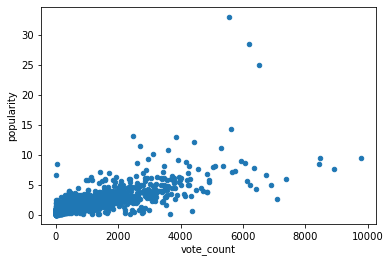

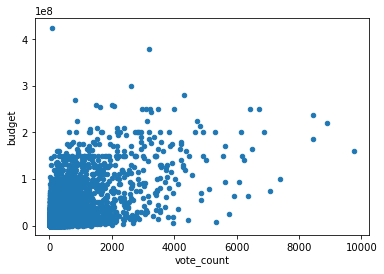

In [29]:
movie_df.plot(x='vote_count', y='popularity', kind='scatter');
movie_df.plot(x='vote_count', y='budget', kind='scatter');

>From the visualizations, the popularity of a movie has a positive relation to the vote count and thus the more popular the movie then the higher the vote count.

>Also noted that a movie that a had a high budget did not guarantee a high vote count.

>So it is safe to say that a movies' popularity increases it chances for higher vote count hence good rating.

### Research Question 2 : Does high or Low rating affect the revenue generated

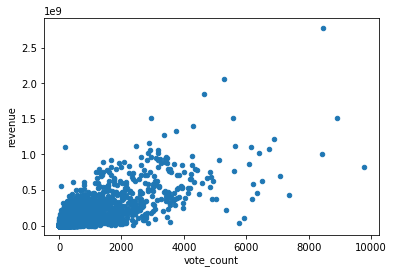

In [30]:
movie_df.plot(x='vote_count', y='revenue', kind='scatter');

>From the graph, the vote count is important factor that affects the revenue generated. Low vote count results to low revenue generated.

### Research Question 3 : Does the runtime affect the revenue generated

In [31]:
#finding the median value of the runtime
movie_df['runtime'].median()

99.0

In [33]:
#we split the movie according to the median
below_median = movie_df.query('runtime < 99.0')
above_median = movie_df.query('runtime >= 99.0')

In [35]:
below_median['revenue'].mean(), above_median['revenue'].mean()

(19070406.01226082, 60197737.973919384)

In [ ]:
movie

>From the mean revenue, we can see the movie with a runtime of more that 99.0 generated more revenue.

In [38]:
#importing the packages to be used in visuals
import matplotlib.pyplot as plt

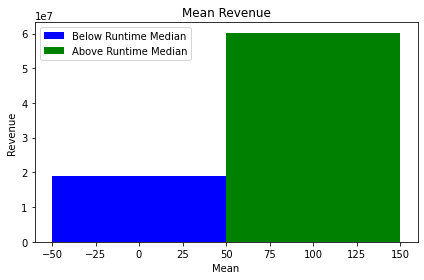

In [40]:
#creating a plot
fig, ax = plt.subplots()
bar_width = 100
X = np.arange(1)

p1 = plt.bar(X, below_median['revenue'].mean(), bar_width, color='b',
label='Below Runtime Median')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, above_median['revenue'].mean(), bar_width,
color='g',
label='Above Runtime Median')

plt.xlabel('Mean')
plt.ylabel('Revenue')
plt.title('Mean Revenue')

plt.legend()

plt.tight_layout()
plt.show()

<a id='conclusions'></a>
## Conclusions

> From the findings above, the popularity of a movie guarantees return on investments as the are seen to return a good figure of revenue.

> Movie rating also affects the revenue as high rating means more revenue. and high rating also plays along with the popularity of the movie

> Many of the movies that generated high revenue had runtimes of more than 99. The ones with a low revenue were seen to have runtime of less. 

>One limitation was due to the fact that I could not categorise the movies in terms of the cast as it would have been a good indicator that could affect the popularity of the movie


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1